In [1]:
from tools import read_metadata, read_results, get_indexes
from plots import plot2D_steps, plot1D_steps

In [2]:
# reload automaticaly external modules
%load_ext autoreload
%autoreload 2

### **Results paths**

In [3]:
paths_all = []
with open("./paths.txt") as f:
    paths_all = f.read().splitlines()
for i,p in enumerate(paths_all):
    print(f'{i: >2}: {p}')

 0: outputs/formatage/780/03_04_01_linear_double_hline
 1: outputs/formatage/57/03_04_01_linear_double_hline
 2: outputs/formatage/703/03_04_01_linear_double_hline
 3: outputs/formatage/557/03_04_01_linear_double_hline
 4: outputs/formatage/123/03_04_01_linear_double_hline
 5: outputs/formatage/365/03_04_01_linear_double_hline
 6: outputs/formatage/220/03_04_01_linear_double_hline
 7: outputs/formatage/664/03_04_01_linear_double_hline
 8: outputs/formatage/632/03_04_01_linear_double_hline
 9: outputs/formatage/160/03_04_01_linear_double_hline
10: outputs/formatage/391/03_04_01_linear_double_hline
11: outputs/formatage/616/03_04_01_linear_double_hline
12: outputs/formatage/280/03_04_01_linear_double_hline
13: outputs/formatage/117/03_04_01_linear_double_hline
14: outputs/formatage/425/03_04_01_linear_double_hline
15: outputs/formatage/902/03_04_01_linear_double_hline
16: outputs/formatage/336/03_04_01_linear_double_hline
17: outputs/formatage/856/03_04_01_linear_double_hline
18: outputs

In [4]:
path = paths_all[-1]

### **Metadata**

In [5]:
degree, rows, cols, *_unused  = read_metadata(path)

### **Load Results**

In [6]:
connectivity,        \
init_center_pos,     \
heights,             \
active_cells,        \
percents_per_steps,  \
stresses_per_steps = \
    read_results(path)

### **Images**

In [7]:
plot2D_steps(connectivity,
             active_cells,
             percents_per_steps,
             init_center_pos,
             stresses_per_steps,
             stress_type='maxBending',
             dir_name=path,
             show_percent=False,
             show_plot=False)

In [8]:
if cols==1 or rows==1:
    plot1D_steps(connectivity,
                 active_cells,
                 percents_per_steps,
                 init_center_pos,
                 stresses_per_steps,
                 stress_type='maxBending',
                 dir_name=path,
                 show_percent=False,
                 show_plot=False)

### **GIF**

In [9]:
fps  = 3 # frames per seconds
loop = 2 # -1: no loop | 0: infinit loop | 1: loop once (see image twice) | 2: loop twice | ...
for name in ['structure_all', 'structure_perSteps', 'structure_own', 'scatter', 'sPlot']:
    img_name_i = f'"{path}/jpg/*{name}*.jpg"'
    gif_name_i = f'"{path}/jpg/gif/{name}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path}/png/*{name}*.png'
    gif_name_i = f'{path}/png/gif/{name}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i
    

### **plot heights**

In [10]:
import matplotlib.pyplot as plt
import numpy as np

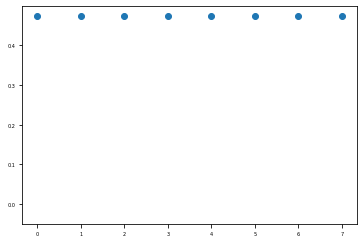

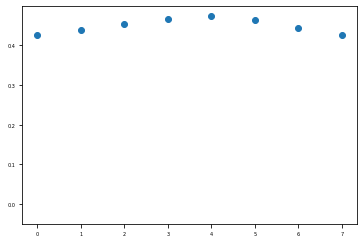

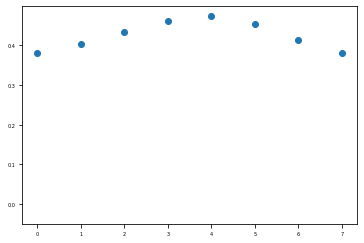

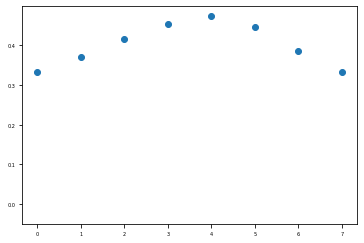

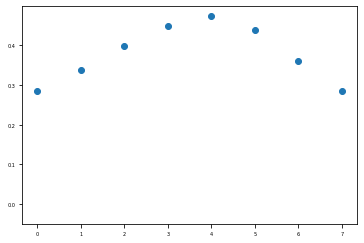

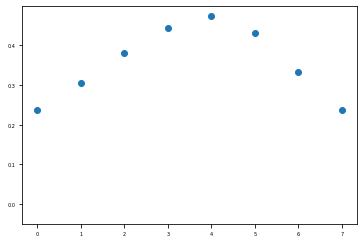

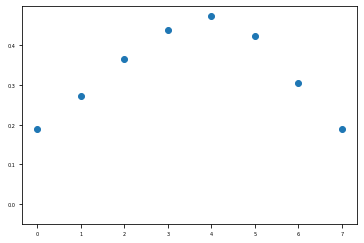

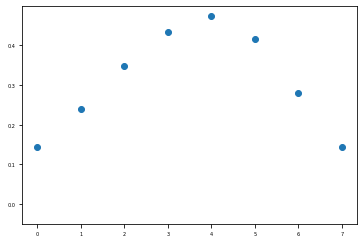

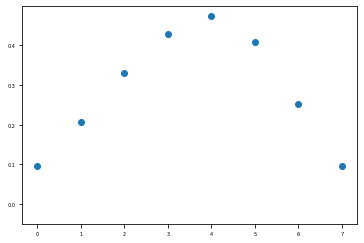

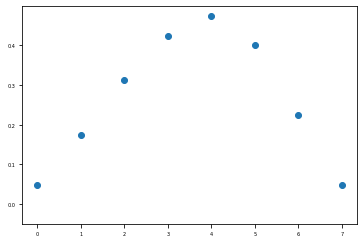

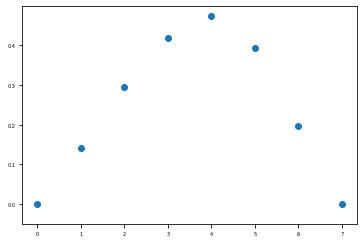

In [15]:
indexes = get_indexes(degree, rows, cols)
max_y = 1.05*np.array(heights).max()
for h in heights:
    _, ax = plt.subplots()
    ax.set_ylim(-0.05, max_y)
    ax.scatter(indexes, h)